In [ ]:
import numpy as np
import matplotlib.pyplot as plt

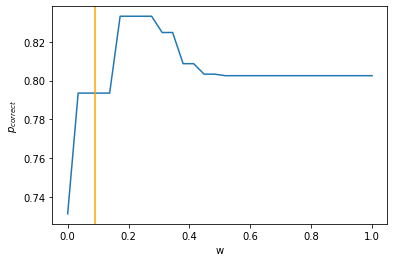

best weight: 0.16666666666666666
[0.7311268873112688, 0.7935206479352065, 0.7935206479352065, 0.7935206479352065, 0.7935206479352065, 0.8332166783321668, 0.8332166783321668, 0.8332166783321668, 0.8332166783321668, 0.8248175182481752, 0.8248175182481752, 0.8087191280871913, 0.8087191280871913, 0.8033196680331967, 0.8033196680331967, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975, 0.8025197480251975]


In [ ]:
#b

def classify(value_array, p):
  '''
  simulates a classification with correct prob p
  
  value_array: ground truth values (0 or 1)
  '''
  correct_class = np.random.rand(len(value_array)) < p
  flipped = np.invert(np.array(value_array, dtype=bool))
  final = np.where(correct_class, value_array, flipped)

  return final
  

def prob_correct_decision(w, ground_truth, classifications):
  '''
  Computes the majority vote of the classifications using weight w for the strong classifier,
  then compares it to the ground truth to get a rough probability of the correct classification
  '''
  vote = w*classifications[0]
  for a in classifications[1:]:
    vote += ((1-w)/10)*a
  vote = np.round(vote)

  final = vote-ground_truth
  final[final == -1] = 1
  final = np.count_nonzero(final == 1)/len(ground_truth)

  return 1-final


array_len = 10000 #number of classified values
ground_truth = np.round(np.random.rand(array_len))

classifications = [] #first is the strong classifier, then the other 10
classifications.append(classify(ground_truth, 0.8))
for i in range(10):
  classifications.append(classify(ground_truth, 0.6))

weights = np.linspace(0, 1, 30)

probs = []
for w in weights:
  probs.append(prob_correct_decision(w, ground_truth, classifications))

plt.plot(weights, probs)
plt.xlabel('w')
plt.ylabel('$p_{correct}$')
plt.axvline(x = 1/11, c='orange')
plt.show()

print('best weight: '+str(np.argmax(probs)/30))
#print(probs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


[]

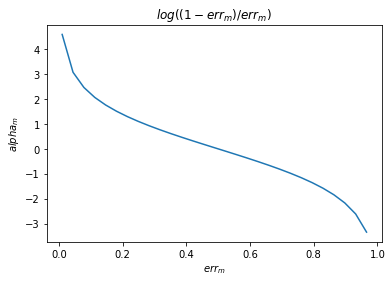

In [ ]:
#d

err_array = np.linspace(0.01,1,30)
alpha = np.log((1-err_array)/err_array)

plt.plot(err_array, alpha)
plt.xlabel('$err_m$')
plt.ylabel('$alpha_{m}$')
plt.title('$log((1-err_m)/err_m)$')
plt.plot()